In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('.\Data\cleaned_Village_data.xlsx', sheet_name='Sheet1')

# Basic data inspection
print("Columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())


Columns: ['ID', 'District', 'Village', 'Population_1945_Arabs', 'Population_1945_Jews', 'Population_1945_Total', 'Total_Land_Areas_Dunums_Arabs', 'Total_Land_Areas_Dunums_Jews', 'Total_Land_Areas_Dunums_Public', 'Total_Land_Areas_Dunums_Total', 'Cultivable_Land_Areas_in_Dunums_Citrus_&_Banana_Land_Arabs', 'Cultivable_Land_Areas_in_Dunums_Citrus_&_Banana_Land_Jews', 'Cultivable_Land_Areas_in_Dunums_Citrus_&_Banana_Land_Total', 'Cultivable_Land_Areas_in_Dunums_Irrigated_&_Plantation_Land_Arabs', 'Cultivable_Land_Areas_in_Dunums_Irrigated_&_Plantation_Land_Jews', 'Cultivable_Land_Areas_in_Dunums_Irrigated_&_Plantation_Land_Total', 'Cultivable_Land_Areas_in_Dunums_Cereal_Land_Arabs', 'Cultivable_Land_Areas_in_Dunums_Cereal_Land_Jews', 'Cultivable_Land_Areas_in_Dunums_Cereal_Land_Public', 'Cultivable_Land_Areas_in_Dunums_Cereal_Land_Total', 'Cultivable_Land_Areas_in_Dunums_Total_Cultivable_Land_Arabs', 'Cultivable_Land_Areas_in_Dunums_Total_Cultivable_Land_Jews', 'Cultivable_Land_Areas_in_D

In [3]:

# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()

# Basic data cleaning
numeric_cols = ['Population_1945_Arabs', 'Population_1945_Jews', 
               'Total_Land_Areas_Dunums_Total', 'Latitude', 'Longitude']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')





Total Population by District (1945):
District
Jaffa        373800
Jerusalem    247350
Haifa        224630
Gaza         137180
al-Ramla     127270
Hebron        89650
Nablus        89200
Tulkarm       86140
Acre          68330
Jinin         56880
Safad         53620
Ramallah      47280
Nazareth      46100
Tiberias      38240
Baysan        23590
Beersheba       150
Name: Population_1945_Total, dtype: int64


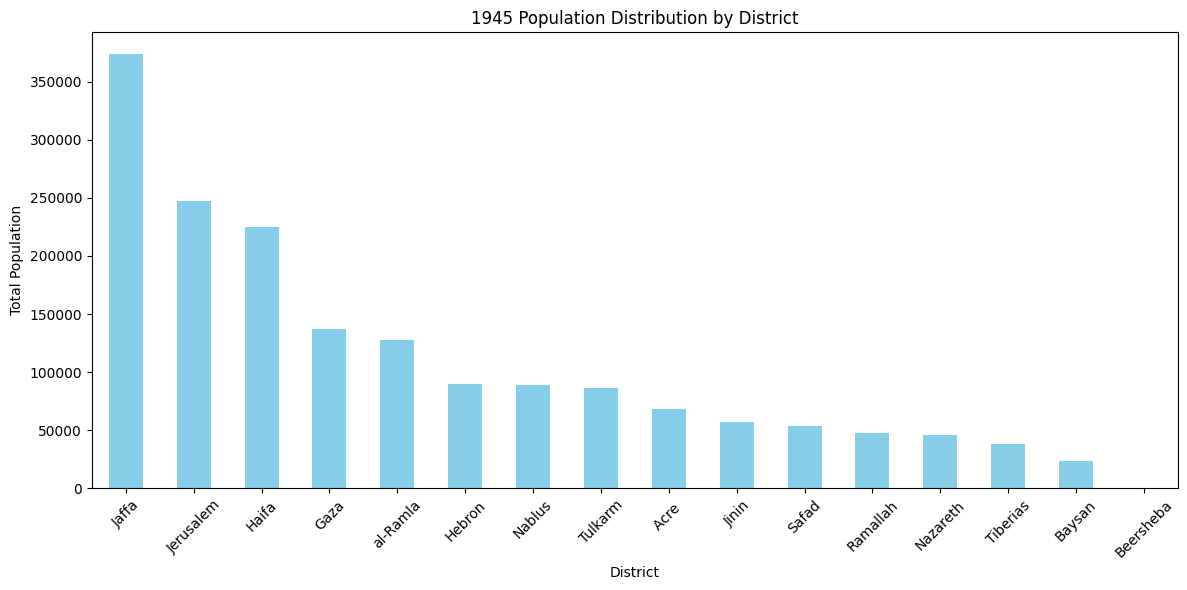

In [6]:
# Analysis 1: Total population by district
district_pop = df.groupby('District')['Population_1945_Total'].sum().sort_values(ascending=False)
print("\nTotal Population by District (1945):")
print(district_pop)

# Visualization: Population distribution
plt.figure(figsize=(12, 6))
district_pop.plot(kind='bar', color='skyblue')
plt.title('1945 Population Distribution by District')
plt.ylabel('Total Population')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:

# Analysis 2: Arab/Jewish population distribution
df['Arab_Jewish_Ratio'] = df['Population_1945_Arabs'] / df['Population_1945_Jews'].replace(0, 1)
district_ratio = df.groupby('District')['Arab_Jewish_Ratio'].mean()
print("\nAverage Arab/Jewish Population Ratio by District:")
print(district_ratio)







Average Arab/Jewish Population Ratio by District:
District
Acre          622.147823
Baysan        181.522468
Beersheba    2434.090909
Gaza          977.517778
Haifa         370.021490
Hebron       1047.500000
Jaffa         615.378844
Jerusalem     671.227739
Jinin         592.500000
Nablus        775.652174
Nazareth      723.245365
Ramallah      738.750000
Safad         312.361508
Tiberias      401.404473
Tulkarm       541.035619
al-Ramla      778.722284
Name: Arab_Jewish_Ratio, dtype: float64


In [8]:
# Analysis 3: Land use patterns
land_use = df.groupby('District').agg({
    'Total_Land_Areas_Dunums_Total': 'mean',
    'Cultivable_Land_Areas_in_Dunums_Total_Cultivable_Land_Total': 'mean'
}).rename(columns={
    'Total_Land_Areas_Dunums_Total': 'Avg_Total_Land',
    'Cultivable_Land_Areas_in_Dunums_Total_Cultivable_Land_Total': 'Avg_Cultivable_Land'
})
print("\nLand Use Patterns by District:")
print(land_use)


Land Use Patterns by District:
           Avg_Total_Land  Avg_Cultivable_Land
District                                      
Acre         10236.240506          4597.708861
Baysan        7647.645833          6066.208333
Beersheba   480595.909091         90909.090909
Gaza         13076.482353         10785.929412
Haifa         8332.260163          4848.373984
Hebron       24716.488095          7831.833333
Jaffa         6449.346154          4766.884615
Jerusalem    13160.853659          2808.105691
Jinin         8700.145833          5068.145833
Nablus       13842.765217          6152.582609
Nazareth      9576.094340          6355.528302
Ramallah     10727.562500          5771.750000
Safad         6445.657407          3417.101852
Tiberias      8646.450980          5805.960784
Tulkarm       7079.305085          5219.144068
al-Ramla      8702.020000          5987.970000


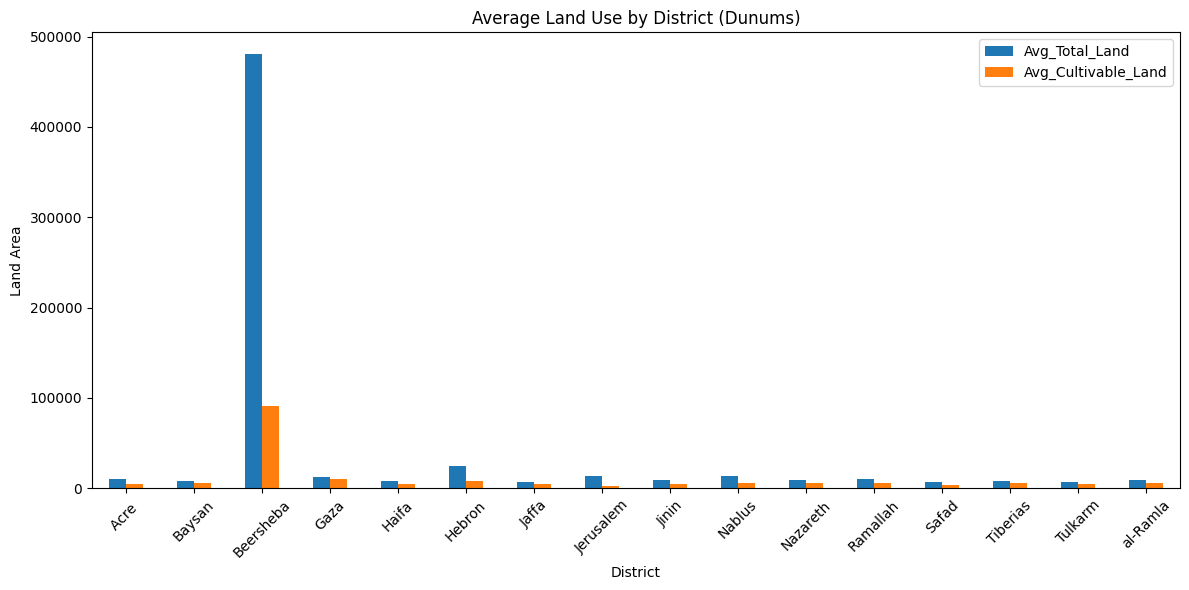

In [9]:
# Visualization: Land use comparison
land_use.plot(kind='bar', figsize=(12, 6))
plt.title('Average Land Use by District (Dunums)')
plt.ylabel('Land Area')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [10]:
# Advanced analysis: Temporal population changes (if data exists)
if 'Population_1948' in df.columns:
    df['Population_Change'] = df['Population_1948'] - df['Population_1945_Total']
    pop_change = df.groupby('District')['Population_Change'].mean()
    print("\nAverage Population Change (1945-1948) by District:")
    print(pop_change)


Average Population Change (1945-1948) by District:
District
Acre          137.430380
Baysan        -78.916667
Beersheba      -6.818182
Gaza         -631.905882
Haifa        -693.869919
Hebron       -802.250000
Jaffa       -4818.730769
Jerusalem   -1208.894309
Jinin        -550.781250
Nablus       -775.652174
Nazareth     -132.226415
Ramallah     -738.750000
Safad         -15.722222
Tiberias     -170.784314
Tulkarm      -636.516949
al-Ramla     -304.540000
Name: Population_Change, dtype: float64
